In [1]:
# Let's quickly review some basic python
# Lists are the most flexible container objects in python
# For example, we can add and remove from anywhere in the list, reorder it, and modify the elements directly
# Lists can also contain different data types in different elements, or even lists of different length

# If you aren't familiar with list behavior in python, play around with this example list of strings,
# from the python tutorial:
fruits = ['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']
print(len(fruits)) # length of list
print(fruits.count('apple'))
print(fruits.count('tangerine'))
print(fruits.index('banana'))
print(fruits.index('banana', 4))  # Find next banana starting a position 4
fruits.reverse()
print(fruits)
fruits.append('grape')
print(fruits)
fruits.sort()
print(fruits)
print(fruits.pop())

7
2
0
3
6
['banana', 'apple', 'kiwi', 'banana', 'pear', 'apple', 'orange']
['banana', 'apple', 'kiwi', 'banana', 'pear', 'apple', 'orange', 'grape']
['apple', 'apple', 'banana', 'banana', 'grape', 'kiwi', 'orange', 'pear']
pear


In [2]:
# Among the most convenient advantages of python is list comprehension

# We could create a list of the first 10 squares using a boring for loop:
squares = [] # an empty list
for x in range(10): # range(n) will generate n integers from 0 to n-1
    squares.append(x**2)
print(squares)

# But we could also create the same list in a single line using list comprehension:
print([x**2 for x in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [3]:
# We'll use the open() function to read the lines from some data files
# First let's read the documentation to figure out what arguments we need to pass to open()
# Note: single- and double-clicking on the left side of a jupyter notebook output will change how it is shown
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise IOError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

In [4]:
# Now let's use readlines() to read each line of our file as a string, storing the whole file within a list:
f = open("2020-03-12_H173_n.csv")
indices = f.readlines() # returns a list of strings, where each line is one element
f.close()
print(indices)

# The above worked, but for the future let's use this safer and more convenient method of opening files:
with open("2020-03-12_H173_n.csv", 'r') as f: # open() uses 'r' for reading mode by default, but we'll be explicit
    indices = f.readlines()
# The file is closed automatically after the indented block is complete

['sample,n\n', '1,1.3358\n', '2,1.3412\n', '3,1.3469\n', '4,1.3525\n', '5,1.3566\n', '6,1.3616\n', '7,1.3642\n', '8,1.3672\n', '9,1.3692\n', '10,1.373\n', '11,1.378\n', '12,1.384\n', '13,1.3889\n', '14,1.395\n', '15,1.4006\n', '16,1.4068\n']


In [5]:
# We can see that readlines() left the newline character (\n) on the end of each line
# We could write a simple for loop to go through our list and remove it,
# but instead we'll use our list comprehension powers, and the rstrip() method of the string class,
# which can also handle \r characters. It returns the same string with trailing character removed
indices = [line.rstrip() for line in indices]
print(indices)

['sample,n', '1,1.3358', '2,1.3412', '3,1.3469', '4,1.3525', '5,1.3566', '6,1.3616', '7,1.3642', '8,1.3672', '9,1.3692', '10,1.373', '11,1.378', '12,1.384', '13,1.3889', '14,1.395', '15,1.4006', '16,1.4068']


In [6]:
# Now, we want to separate the two fields of this CSV file
# The split() method of the string class will let us split our strings into lists of strings at every comma:
indices = [line.split(',') for line in indices]
print(indices)
# Now we have a list of lists of strings

[['sample', 'n'], ['1', '1.3358'], ['2', '1.3412'], ['3', '1.3469'], ['4', '1.3525'], ['5', '1.3566'], ['6', '1.3616'], ['7', '1.3642'], ['8', '1.3672'], ['9', '1.3692'], ['10', '1.373'], ['11', '1.378'], ['12', '1.384'], ['13', '1.3889'], ['14', '1.395'], ['15', '1.4006'], ['16', '1.4068']]


In [7]:
# Taking a look, we can see that the first list/line (element 0 of indices) is just a header that we don't need:
print(indices[0])
# And the first column (element 0 of each list within indices) is just a sample number that we also don't need:
print([line[0] for line in indices])

['sample', 'n']
['sample', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [8]:
# Let's simplify our lives by turning our list of lists of strings into what we actually want:
# just the floats in the second column, without a header:
indices = [float(line[1]) for line in indices[1:]] # convert the 2nd element of each sublist into a float,
# starting with the second sublist
print(indices)

[1.3358, 1.3412, 1.3469, 1.3525, 1.3566, 1.3616, 1.3642, 1.3672, 1.3692, 1.373, 1.378, 1.384, 1.3889, 1.395, 1.4006, 1.4068]


In [9]:
# With great list comprehension power comes great list comprehension responsibility
# Note that we could have accomplished all of this in two lines, but no one else would ever have a chance
# of understanding our code:
with open("2020-03-12_H173_n.csv", 'r') as f:
    indices = [float(line.rstrip().split(',')[1]) for line in f.readlines()[1:]]
print(indices)

[1.3358, 1.3412, 1.3469, 1.3525, 1.3566, 1.3616, 1.3642, 1.3672, 1.3692, 1.373, 1.378, 1.384, 1.3889, 1.395, 1.4006, 1.4068]


In [10]:
# For common file formats like CSV, XLS, etc. we can save a lot of time by using the parsers in libraries like
# NumPy (used widely for high-level math) or Pandas (which creates R-like dataframes convenient for data analysis)

# Let's import NumPy so we can use its file-reading functions. We'll give it a simple abbreviation
# because we're lazy. Behold, a contender for most common line of code:
import numpy as np

# The central feature of NumPy is the NumPy array. Arrays are more restrictive than lists, but also more efficient
# Essentially all NumPy functions return arrays, and will convert arguments from lists to arrays
# As long as all of our elements are of the same type, we can largely ignore the differences
# Let's make a list of lists, then convert it into a 2-dimensional array to convince ourselves:
listoflists = [[1,2,3],[4,5,6]]
print(np.array(listoflists))

listoflists = [[1,2,"If we try to mix a string in an array with integers..."],[4,5,6]]
print(np.array(listoflists)) # NumPy will outsmart us and convert the entire array to a string array

# We can also force NumPy arrays to have a desired data type. The below would throw a ValueError:
# print(np.array(listoflists, dtype = int))

[[1 2 3]
 [4 5 6]]
[['1' '2' 'If we try to mix a string in an array with integers...']
 ['4' '5' '6']]


In [11]:
# Let's use NumPy's loadtxt, with comma delimiter, and tell it to skip 1 row plus only use the 2nd column:
indices = np.loadtxt("2020-03-12_H173_n.csv", delimiter = ',', skiprows = 1, usecols = 1)
print(indices)

# We could also convert this back to a list, if we want:
print(indices.tolist())
# list(indices) produces the same result for our 1D array, but only works in the first dimension,
# eg list(np.array(listoflists)) returns a list of NumPy arrays...

# There are a lot of other cool features of NumPy arrays, but we won't cover them here

[1.3358 1.3412 1.3469 1.3525 1.3566 1.3616 1.3642 1.3672 1.3692 1.373
 1.378  1.384  1.3889 1.395  1.4006 1.4068]
[1.3358, 1.3412, 1.3469, 1.3525, 1.3566, 1.3616, 1.3642, 1.3672, 1.3692, 1.373, 1.378, 1.384, 1.3889, 1.395, 1.4006, 1.4068]


In [12]:
# indices contains the measured refractive index for a bunch of urea solutions of increasing concentration
# indices[0] is known to have no urea, so we'll use the Maclaurin series expansion from  
# https://doi.org/10.1016/0076-6879(86)31045-0
# [urea] = 117.66Δn + 29.753 Δn**2 + 185.56Δn**3

# We'll use some math functions from numpy: np.square() and np.power(), and the subtraction operator:
print(indices - indices[0]) # subtract the scalar indices[0] from every element of the array indices
print(np.square(indices - indices[0])) # square every element of the array produced by the line above
ureaconcentration = 117.66 * (indices - indices[0]) + \
                    29.753 * np.square(indices - indices[0]) + \
                    185.56 * np.power((indices - indices[0]), 3)
print(ureaconcentration)

# We could easily do this with python lists as well, but it is more tedious
# The only operation here that python will interpret element-wise as we intend is the addition of the 3 terms:
indiceslist = indices.tolist()
ureaconcentrationlist = [117.66 * (index - indiceslist[0]) for index in  indiceslist] + \
                        [29.753 * (index - indiceslist[0]) ** 2 for index in  indiceslist] + \
                        [185.56 * (index - indiceslist[0]) ** 3 for index in  indiceslist]
print(ureaconcentrationlist)

[0.     0.0054 0.0111 0.0167 0.0208 0.0258 0.0284 0.0314 0.0334 0.0372
 0.0422 0.0482 0.0531 0.0592 0.0648 0.071 ]
[0.00000e+00 2.91600e-05 1.23210e-04 2.78890e-04 4.32640e-04 6.65640e-04
 8.06560e-04 9.85960e-04 1.11556e-03 1.38384e-03 1.78084e-03 2.32324e-03
 2.81961e-03 3.50464e-03 4.19904e-03 5.04100e-03]
[0.         0.63626082 1.30994564 1.97408405 2.46187018 3.0586195
 3.36979207 3.72960405 3.96994917 4.42767781 5.03218244 5.7611144
 6.35942014 7.10824456 7.7997925  8.57025884]
[0.0, 0.6353639999999823, 1.3060259999999868, 1.9649219999999925, 2.4473279999999917, 3.035627999999979, 3.3415439999999976, 3.694523999999985, 3.929843999999985, 4.376951999999988, 4.965251999999976, 5.671211999999976, 6.247745999999991, 6.96547199999999, 7.624367999999996, 8.353859999999994, 0.0, 0.0008675974799999516, 0.003665867129999926, 0.008297814169999937, 0.012872337919999912, 0.01980478691999973, 0.023997579679999968, 0.02933526787999976, 0.033191256679999746, 0.041173391519999776, 0.052985332519

In [13]:
# We also have relative intensity values for our protein band from an SDS-PAGE gel:
intensities = np.loadtxt("2020-03-12_H173_2-14.csv", delimiter = ',', skiprows = 1, usecols = 1)

# We were only able to quantify bands 2-14 of the 16 bands, resulting in a smaller list:
print(intensities.shape) # Note: len(intensities) is equivalent for 1D arrays
print(ureaconcentration.shape)

# To match the pairs, we can index from the 2nd value of ureaconcentration to the 14th value:
print(ureaconcentration[1:14])
# We also could have explicitly excluded the last two values with ureaconcentration[1:-2]
# or even provided a list of the elements we wanted (unique to arrays, does not work with lists):
# ureaconcentration[list(range(1,14))]

(13,)
(16,)
[0.63626082 1.30994564 1.97408405 2.46187018 3.0586195  3.36979207
 3.72960405 3.96994917 4.42767781 5.03218244 5.7611144  6.35942014
 7.10824456]


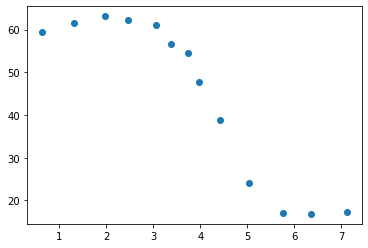

In [14]:
# This line is literally invoking a "magic function" of IPython and we won't try to understand:
%matplotlib inline
# Let's import just the pyplot set of functions from the matplotlib module, and call it plt:
from matplotlib import pyplot as plt

# Now let's simply plot band intensity versus urea concentration:
plt.scatter(ureaconcentration[1:14], intensities)
# You can choose to not use the magic function above or plt.show() and all plots after the first
# (which you will have to rerun) will appear static as expected with the other two methods...

Text(0.5, 1.0, 'Pulse proteolysis of H-Ras 1-173')

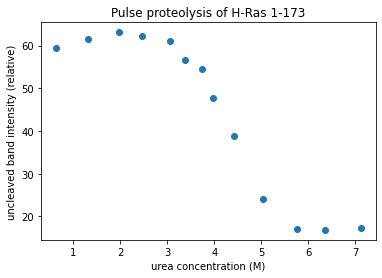

In [15]:
# Looks like we have a cooperative folding transition that we should later be able to fit
# Let's just add some labels to our plot

plt.scatter(ureaconcentration[1:14], intensities)
plt.xlabel("urea concentration (M)")
plt.ylabel("uncleaved band intensity (relative)")
plt.title("Pulse proteolysis of H-Ras 1-173")
# We could now use plt.savefig("filename.extension") to save this. I like to save my plots as pdfs

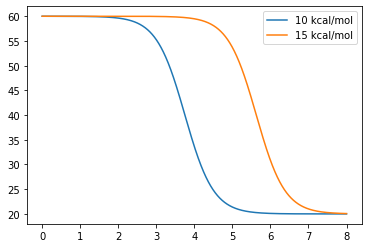

In [16]:
# Let's define a function describing this cooperative transition:
def func(x, b, c, dg): # arguments: urea concentration, nuisance scale parameter, nuisance offset, and deltaG
    m = 1.579 # proportionality constant between urea concentration and change in free energy of folding (deltaG)
    return b * (1 - np.exp(-m * x / 0.5924849497 + dg)) / (1 + np.exp(-m * x / 0.5924849497 + dg)) - c

# Here, we've fixed m to a previously-estimated value for now

# Let's get a feel for reasonable parameters. Let's create an array with 10000 points spaced evenly from 0 to 8:
x = np.linspace(0, 8, 10000)
# Take the function of every point in x, with parameters that give us a curve vaguely like what we see in the data:
y = func(x, -20, -40, 10)
# And plot it:
plt.plot(x,y)
# Now let's plot another curve with 5 kcal/mol different deltaG
y = func(x, -20, -40, 15)
plt.plot(x,y)
# And let's add a legend using a list of names so we know what's going on:
plt.legend(["10 kcal/mol", "15 kcal/mol"])

In [17]:
# Let's import only the nonlinear least squares curve fitting function from the scipy module
from scipy.optimize import curve_fit

# We will feed curve_fit() our func, the x (urea) values, the y (intensity) values, and some reasonable guesses,
# then it will return two arrays: one with the optimized parameters, and one with their estimated covariance
popt, pcov = curve_fit(func, ureaconcentration[1:14], intensities, p0 = [-20, -40, 10])
print(popt) # b, c, and dg parameters in the order they appear as arguments
print(pcov)

[-22.24719873 -39.10989123  11.63823523]
[[ 0.23489257 -0.07064772 -0.00432551]
 [-0.07064772  0.27997745  0.03643714]
 [-0.00432551  0.03643714  0.01257624]]


[0.48465717 0.52912896 0.11214384]


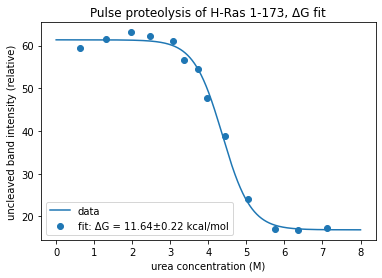

In [18]:
# Let's look at how well-determined our parameters seem to be first. We'll take the square root of the
# diagonal entries (self-covariance, aka variance of the parameter estimates) to get a standard deviation:
print(np.sqrt(np.diag(pcov)))
# The deltaG seems fairly well-determined, but let's take a look at the fit itself. We'll again create x-values:
x = np.linspace(0, 8, 10000)
# and calculate our function of those x-values with optimized parameters:
y = func(x, popt[0], popt[1], popt[2]) # Note: could also use func(x, *popt), which will unpack the list
# and plot
plt.scatter(ureaconcentration[1:14], intensities)
plt.plot(x, y)
plt.xlabel("urea concentration (M)")
plt.ylabel("uncleaved band intensity (relative)")
plt.title("Pulse proteolysis of H-Ras 1-173, ΔG fit")
# Here I will use C-style string formatting to trim the numbers down to just 2 digits after the decimal
# There are also other ways to format floats within strings in python
# Also, here I am reporting ± 2 standard deviations, or roughly a 95% confidence interval
plt.legend(["data", "fit: ΔG = %.2f±%.2f kcal/mol" % (popt[2], 2 * np.sqrt(np.diag(pcov))[2])])

[-22.6778593  -39.05270907   1.41805335  10.47944917]
[[ 0.38240107 -0.09662704  0.05039844  0.35695233]
 [-0.09662704  0.28735704 -0.00843385 -0.02457757]
 [ 0.05039844 -0.00843385  0.01687999  0.12105772]
 [ 0.35695233 -0.02457757  0.12105772  0.87917907]]


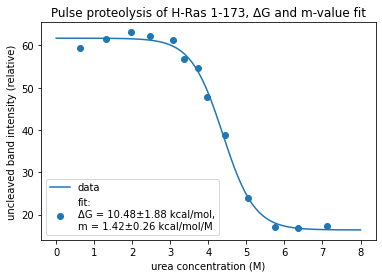

In [19]:
# Usually, you do not fit the m-value (urea proportionality constant or equivalently slope at the midpoint)
# and deltaG together from pulse proteolysis data, because there are few points in the transition region.
# Let's just play around with how bad an idea this is on our data:

# We'll redefine func() to take m as an argument:
def func(x, b, c, m, dg):
    return b * (1 - np.exp(-m * x / 0.5924849497 + dg)) / (1 + np.exp(-m * x / 0.5924849497 + dg)) - c

popt, pcov = curve_fit(func, ureaconcentration[1:14], intensities, p0 = [-20, -40, 1.6, 10])
print(popt)
print(pcov)
y = func(x, *popt)
plt.scatter(ureaconcentration[1:14], intensities)
plt.plot(x, y)
plt.xlabel("urea concentration (M)")
plt.ylabel("uncleaved band intensity (relative)")
plt.title("Pulse proteolysis of H-Ras 1-173, ΔG and m-value fit")
plt.legend(["data", "fit:\nΔG = %.2f±%.2f kcal/mol,\nm = %.2f±%.2f kcal/mol/M" % (popt[3], 2 * np.sqrt(np.diag(pcov))[3], popt[2], 2 * np.sqrt(np.diag(pcov))[2])])

# We see that the diagonal terms corresponding to the covariance between m-value and deltaG are large,
# but it is hard for us to really grasp in this format

Text(0.5, 1.0, 'Our estimates of the ΔG and m-value from this data\nare heavily correlated and poorly-determined')

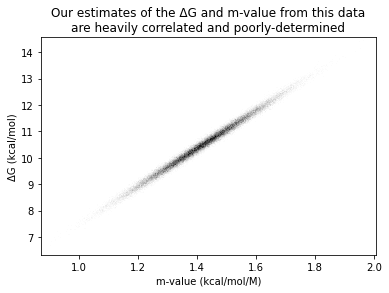

In [20]:
# Let's take this covariance matrix at its face and histogram up a bunch of samples from a bivariate normal
# distribution to understand the approximate joint distribution of our parameter estimates
# NumPy makes the sampling easy:
draws = np.random.multivariate_normal(popt[-2:], pcov[-2:, -2:], 100000)
# And matplotlib lets us directly draw a 2D histogram:
plt.hist2d(draws[:,0], draws[:,1], bins = 400, cmap = 'binary')
plt.xlabel("m-value (kcal/mol/M)")
plt.ylabel("ΔG (kcal/mol)")
plt.title("Our estimates of the ΔG and m-value from this data\nare heavily correlated and poorly-determined")

# Hopefully it is now obvious why we should stick to fitting just the deltaG (or equivalently Cm) at fixed m-value

In [21]:
# Let's be a bit more rigorous using Bayesian inference
# We'll import the affine-invariant Markov Chain Monte Carlo (MCMC) sampler from the module emcee ("the hammer")
import emcee

# This function is just the log-likelihood for a normal distribution, mean of our function and sigma to be fit
# The parameters must be the first argument for emcee
def log_likelihood(theta, x, y):
    b, c, m, dg, sigma2 = theta # We have to wrap up our parameters into a single list, we'll call it theta
    ypred = func(x, b, c, m, dg)
    return -0.5 * (np.sum(np.square(y - ypred) / sigma2 + np.log(2 * np.pi * sigma2)))

# We'll let b and c be -256 to 0, m be 0 to 3, and deltaG be 0 to 30, plus ensure positive variance
def log_prior(theta):
    b, c, m, dg, sigma2 = theta
    if -256 <= b <= 0 and -256 <= c <= 0 and 0 < m < 3 and 0 < dg <= 30 and 0 < sigma2:
        return 0.0
    return -np.inf

def log_probability(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

init = [*popt, 1] + 1e-4 * np.random.randn(32, 5)

sampler = emcee.EnsembleSampler(32, 5, log_probability, args=(ureaconcentration[1:14], intensities))
sampler.run_mcmc(init, 100256, progress=True)

100%|██████████| 100256/100256 [02:43<00:00, 612.58it/s]


State([[-22.11211684 -38.14816078   1.60046457  11.88246934   4.41325021]
 [-22.71532701 -37.86393799   1.44999411  10.75381928  11.59389937]
 [-23.26630702 -39.21181205   1.44988964  10.60316652   2.85750247]
 [-23.86385557 -38.90915572   1.368354    10.1723975    1.67170737]
 [-20.74810002 -38.92298821   2.25176844  16.68809509   6.46990262]
 [-23.74424479 -40.08143398   1.31409419   9.55310146   3.02064425]
 [-21.74518744 -38.46920788   1.53112322  11.48848865   3.68270699]
 [-21.74313088 -39.42208495   1.48521912  10.77499461   3.87135513]
 [-21.24250138 -39.75297944   1.89296704  13.66707988   2.82436592]
 [-24.0181155  -38.44850481   1.25207409   9.36429333   4.42806635]
 [-22.70210571 -39.37515396   1.66762664  12.24963515   3.55537298]
 [-22.25561708 -39.76933877   1.58101424  11.5384751    1.96274176]
 [-22.5158659  -37.06952981   1.50575962  11.44966118   5.3321111 ]
 [-23.65707372 -37.85943256   1.64591314  12.43725109   4.54905625]
 [-21.19466376 -38.29140749   1.74139998  

95% confidence interval on m: 1.1639339562705144-1.908030714950723
95% confidence interval on ΔG: 8.642293065317034-14.043228493088042
Correlation between m and ΔG: 0.9938226557994302


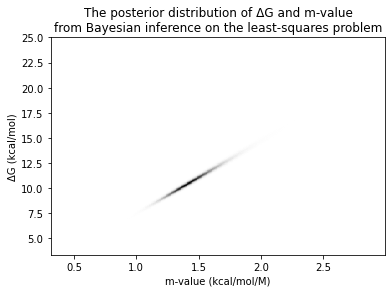

In [22]:
samples = sampler.get_chain(discard = 256) # We'll blindly discard the first 256 samples as burn-in
plt.hist2d(samples[:,:,2].flatten(), samples[:,:,3].flatten(), bins = 400, cmap = 'binary')
plt.xlabel("m-value (kcal/mol/M)")
plt.ylabel("ΔG (kcal/mol)")
plt.title("The posterior distribution of ΔG and m-value\nfrom Bayesian inference on the least-squares problem")
print("95% confidence interval on m: " + str(np.quantile(samples[:,:,2].flatten(), 0.025)) + "-" + str(np.quantile(samples[:,:,2].flatten(), 0.975)))
print("95% confidence interval on ΔG: " + str(np.quantile(samples[:,:,3].flatten(), 0.025)) + "-" + str(np.quantile(samples[:,:,3].flatten(), 0.975)))
print("Correlation between m and ΔG: " + str(np.corrcoef(samples[:,:,2].flatten(), samples[:,:,3].flatten())[0,1]))